In [ ]:
#Installing the packages
import numpy as np
import pandas as pd

In [ ]:
import glob

In [ ]:
for file in glob.glob('./*.xlsx'):
    if '~$' in file:
        continue
    else:
        df = pd.read_excel("/content/Rotten_Tomatoes_Movies3.xls",
            engine='openpyxl'
        )

In [ ]:
#Loading the data
data = pd.read_excel("/content/Rotten_Tomatoes_Movies3.xls")

EXPLORING THE DATASET

In [ ]:
data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [ ]:
data.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [ ]:
data.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [ ]:
data = data.fillna(data.median(numeric_only=True))

In [ ]:
data.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [ ]:
target = 'audience_rating'
features = [col for col in data.columns if col != target]

In [ ]:
features

['movie_title',
 'movie_info',
 'critics_consensus',
 'rating',
 'genre',
 'directors',
 'writers',
 'cast',
 'in_theaters_date',
 'on_streaming_date',
 'runtime_in_minutes',
 'studio_name',
 'tomatometer_status',
 'tomatometer_rating',
 'tomatometer_count']

SPLIT THE DATASET

In [ ]:
#Installing the packages for the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = data[features]
y = data[target]

In [ ]:
y.isnull().sum()

0

In [ ]:
X = X.fillna(method='ffill')

<ipython-input-16-3ba74b1bdbe7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


In [ ]:
X.isnull().sum()

,0
movie_title,0
movie_info,0
critics_consensus,0
rating,0
genre,0
directors,0
writers,0
cast,0
in_theaters_date,0
on_streaming_date,0


In [ ]:
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype(str)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16638 non-null  object        
 2   critics_consensus   16638 non-null  object        
 3   rating              16638 non-null  object        
 4   genre               16638 non-null  object        
 5   directors           16638 non-null  object        
 6   writers             16638 non-null  object        
 7   cast                16638 non-null  object        
 8   in_theaters_date    16638 non-null  datetime64[ns]
 9   on_streaming_date   16638 non-null  datetime64[ns]
 10  runtime_in_minutes  16638 non-null  float64       
 11  studio_name         16638 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.info(),y_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13310 entries, 13450 to 15795
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         13310 non-null  object        
 1   movie_info          13310 non-null  object        
 2   critics_consensus   13310 non-null  object        
 3   rating              13310 non-null  object        
 4   genre               13310 non-null  object        
 5   directors           13310 non-null  object        
 6   writers             13310 non-null  object        
 7   cast                13310 non-null  object        
 8   in_theaters_date    13310 non-null  datetime64[ns]
 9   on_streaming_date   13310 non-null  datetime64[ns]
 10  runtime_in_minutes  13310 non-null  float64       
 11  studio_name         13310 non-null  object        
 12  tomatometer_status  13310 non-null  object        
 13  tomatometer_rating  13310 non-null  int64      

In [ ]:
assert X_train.isnull().sum().sum() == 0, "X_train contains NaN values"
assert y_train.isnull().sum() == 0, "y_train contains NaN values"

PREPROCESSING

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status'],
      dtype='object'))])

MODEL ONE : RANDOM FOREST REGRESSOR





  Random Forest Regression is a versatile machine-learning technique for predicting numerical values that combines the predictions of multiple decision trees to reduce overfitting and improve accuracy.

In [ ]:
model = RandomForestRegressor(random_state=42)

In [ ]:
#creating the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'studio_name', 'tomatometer_st...
                                                                   StandardScaler(),
                                                                   Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status'],
      dtype='object'))])),
                                 ('regressor',
                                  RandomForestRegressor(random_state=42))]))])

In [ ]:
#Fitting the model
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
#Predicting the test data
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([45.97, 59.07, 67.09, ..., 73.35, 73.5 , 60.49])

In [ ]:
#Accuracy Prediction
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 14.550338951783178
R-squared (R2): 0.481047764016003


In [ ]:
#Installing the packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

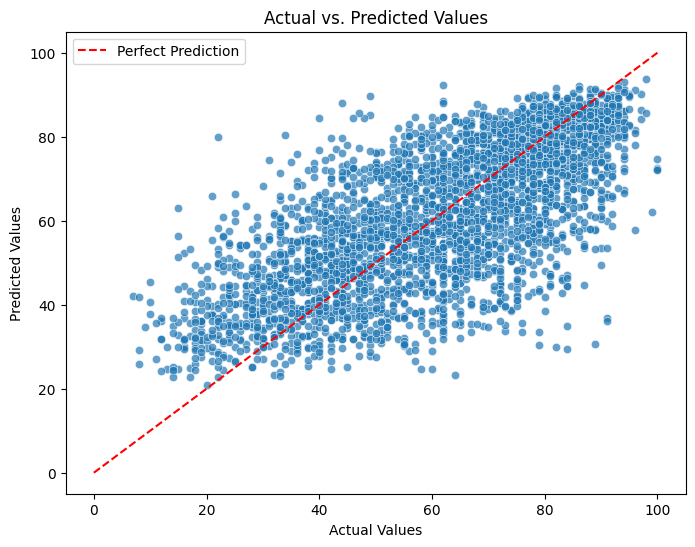

In [ ]:
#Plotting the prediction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

MODEL TWO:LIGHTGBM



LightGBM (Light Gradient Boosting Machine) is an open-source, high-performance gradient boosting framework developed by Microsoft. It constructs a strong learner by sequentially adding weak learners in a gradient descent manner, optimizing memory usage and training time .

In [ ]:
#Installing for the model two
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
#Creating the model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lgbm_model)
])

In [ ]:
lgbm_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status'],
      dtype='object'))])),
                ('model', LGBMRegressor(random_state=42))])

In [ ]:
#Fitting the model
lgbm_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 13310, number of used features: 231
[LightGBM] [Info] Start training from score 60.475582


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status'],
      dtype='object'))])),
                ('model', LGBMRegressor(random_state=42))])

In [ ]:
#Predicting the test data
y_pred_lgbm = lgbm_pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


In [ ]:
#Accuracy Prediction
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
lgbm_r2 = r2_score(y_test, y_pred_lgbm)

In [ ]:
print(f'LightGBM - RMSE: {lgbm_rmse}')
print(f'LightGBM - R^2 Score: {lgbm_r2}')

LightGBM - RMSE: 13.96338530120137
LightGBM - R^2 Score: 0.5220718506084874


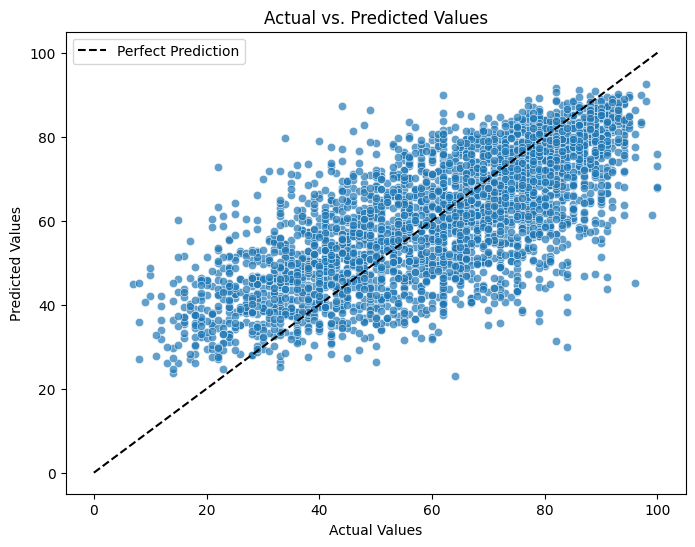

In [ ]:
#Plotting the prediction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lgbm, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()